# Robert Roche
## CS 383 HW1 Code

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from math import *
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

### Problem 1 Code

Below is problem 1 part b, comparing my coefficients to those calculated by the sklearn library it appears my calculations are correct. Following the usage of the sklearn library I implemented my own calculations and they appear to have the same result.

### 1)

theta0 = 1.0285891858297078
theta1= -0.4126786824114355
Line equation:	y=(-0.4126786824114355)x+(1.0285891858297078)


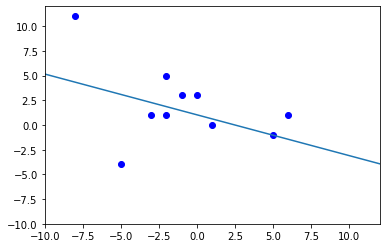

In [3]:
#(-2,1 ; -5,-4 ; -3,1 ; 0,3 ; -8,11 ; -2,5 ; 1,0 ; 5,-1 ; -1,-3 ; 6,1)

#plotting the points
X = [[-2,1],
    [-5,-4],
    [-3,1],
    [0,3],
    [-8,11],
    [-2,5],
    [1,0],
    [5,-1],
    [-1,3],
    [6,1]]
X = np.array(X)


plt.plot(X[:,0],X[:,1],'bo')
plt.ylim(-10,12)
plt.xlim(-10,12)
############################

#X and Y Matrices
Xmat = [[-2],
        [-5],
        [-3],
        [0],
        [-8],
        [-2],
        [1],
        [5],
        [-1],
        [6]]

Ymat = [[1],
        [-4],
        [1],
        [3],
        [11],
        [5],
        [0],
        [-1],
        [-3],
        [1]]

#Finding the coefficients/intercepts
Xmat = np.array(Xmat)
Ymat = np.array(Ymat)
model = LinearRegression()
model.fit(Xmat,Ymat)

m = model.coef_[0][0]
b = model.intercept_[0]
print("theta0 =",b)
print("theta1=",m)
ps = "Line equation:\ty=("+str(m)+")x+("+str(b)+")"
print(ps)
x = np.linspace(-12,12)
y = model.predict(x[:,None])
plt.plot(x,y)
plt.show()




[35.8 -9.4 -5.6]


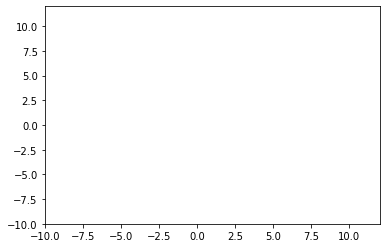

In [23]:
#(-2,1 ; -5,-4 ; -3,1 ; 0,3 ; -8,11 ; -2,5 ; 1,0 ; 5,-1 ; -1,-3 ; 6,1)


#These are the results of using my calculations

#plotting the points
X = [[-2,1],
    [-5,-4],
    [-3,1],
    [0,3],
    [-8,11],
    [-2,5],
    [1,0],
    [5,-1],
    [-1,3],
    [6,1]]
X = np.array(X)


plt.ylim(-10,12)
plt.xlim(-10,12)
############################

#X and Y Matrices
Xmat = [[1,2,3],
        [1,5,-2],
        [1,3,1]]

Ymat = [0.2,0,2]

#Finding the theta
Xmat = np.array(Xmat)
Ymat = np.array(Ymat)
#from lexture example
thetas = np.linalg.inv(Xmat.T @ Xmat) @ Xmat.T @ Ymat
####################
print(thetas)

### 2)

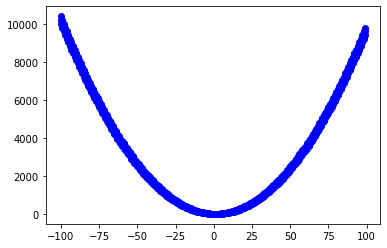

Min value for J is 0


In [5]:
x1 = 0
x2 = [0,1,2]
J=0
Jmin = 100000
def getJ(x1,x2):
    return((x1+x2-2)**2)
i =-100
while (i<100):
    x1 = i
    for j in x2:
        J=getJ(x1,j)
        if(J<Jmin):
            Jmin = J
        plt.plot(x1,J,"bo")
    i+=1
plt.show()
print("Min value for J is "+ str(Jmin))

### Problem 2 Code

In [21]:
#helped me read in the data properly
#https://stackoverflow.com/questions/19143667/how-to-read-a-csv-without-the-first-column
f = open("x06Simple.csv")
length = len(f.readline().split(','))
data=np.loadtxt("x06Simple.csv", delimiter=",", skiprows = 1, usecols=range(1,length))
#print(data)

#set random seed at 0 as specified
np.random.seed(0)
np.random.shuffle(data)

data = np.array(data)

#slice data so y is the length of the fish and x is the reamining columns
x = [[2,3],[5,-2],[3,1]]
y = [[0.2],[0],[2]]
x = np.array(x)
y = np.array(y)
#split the data into 2/3 trainging 1/3 testing
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size = (1/3),random_state=0)
print(xtrn)
mean = np.mean(xtrn,axis=0)
std=np.std(xtrn,axis=0,ddof=1)
#sxtrn is the standardized trainging set
sxtrn = (xtrn-mean)/std
sxtst = (xtst-mean)/std
print(sxtrn)
sxtrn = np.insert(sxtrn, 0, values = 1, axis = 1)
sxtst = np.insert(sxtst, 0, values = 1, axis = 1)
thetas = np.linalg.inv(sxtrn.T @ sxtrn)@sxtrn.T@ ytrn
print("theta0=\t"+str(thetas[0]))
print("theta1=\t"+str(thetas[1]))
print("theta2=\t"+str(thetas[2]))
print("\ny="+str(thetas[0])+"+("+str(thetas[1])+")x1"+"+("+str(thetas[2])+")x2")

y_hat = sxtst @ thetas
ser =0
N=len(y_hat)

for i in range(N):
    ser += (ytst[i] - y_hat[i]) ** 2
rmse = sqrt(ser/N)

print("\nRMSE=\t"+str(rmse))

[[ 5 -2]
 [ 2  3]]
[[ 0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


LinAlgError: Singular matrix

### Problem 3 Code

In [7]:
#helped me read in the data properly
#https://stackoverflow.com/questions/19143667/how-to-read-a-csv-without-the-first-column
f = open("x06Simple.csv")
length = len(f.readline().split(','))
data=np.loadtxt("x06Simple.csv", delimiter=",", skiprows = 1, usecols=range(1,length))
#print(data)

#set random seed at 0 as specified
np.random.seed(0)
np.random.shuffle(data)

data = np.array(data)

#slice data so y is the length of the fish and x is the reamining columns
y = data[:, 2]
x = data[:,0:2]
x = np.array(x)
y = np.array(y)
#split the data into 2/3 trainging 1/3 testing
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size = (1/3),random_state=0)

#calculate the mean and standard deviation
mean = np.mean(xtrn,axis=0)
std=np.std(xtrn,axis=0,ddof=1)

#calculate the standardized training and test sets for x
sxtrn = (xtrn-mean)/std
sxtst = (xtst-mean)/std

#add bias
sxtrn = np.insert(sxtrn, 0, values = 1, axis = 1)
sxtst = np.insert(sxtst, 0, values = 1, axis = 1)

#initialize distance array, thetas,SE, and a count variable
dist = []
thetas = []
counti = 0
SE=0
N=0
#for each test set
for i in sxtst:
    thetas = []
    #go through each training set and calculate the thetas and SE
    for j in sxtrn:
        dist=np.append(dist,np.exp(-1*(np.sum(np.square(np.subtract(j,i))))))
    W = np.diag(dist)
    dist=[]
    #print(W)
    #calculates thetas
    thetas = np.append(thetas,np.linalg.inv(sxtrn.T@W@sxtrn)@sxtrn.T@W@ytrn)
    y_hat = i@thetas
    SE+=(ytst[counti]-y_hat)**2
    counti+=1
    
N=len(sxtst)
#claculate root mean square error by 
RMSE = sqrt(SE/N)

print("Thetas",thetas)
print("\nRMSE="+str(RMSE))

Thetas [3610.74661451 1840.94463029  -58.38462852]

RMSE=351.6779056674261


### Problem 4 Code

In [2]:
#helped me read in the data properly
#https://stackoverflow.com/questions/19143667/how-to-read-a-csv-without-the-first-column
f = open("x06Simple.csv")
length = len(f.readline().split(','))
data=np.loadtxt("x06Simple.csv", delimiter=",", skiprows = 1, usecols=range(1,length))
f.close()
#print(data)

#set random seed at 0 as specified
np.random.seed(1)
np.random.shuffle(data)

data = np.array(data)

#slice data so y is the length of the fish and x is the reamining columns
y = data[:, 2]
x = data[:,0:2]
x = np.array(x)
y = np.array(y)

#split the data into 2/3 trainging 1/3 testing
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size = (1/3),random_state=0)

#calculate the mean and standard deviation
mean = np.mean(xtrn,axis=0)
std=np.std(xtrn,axis=0,ddof=1)

#calculate the standardized training and test sets for x
sxtrn = (xtrn-mean)/std
sxtst = (xtst-mean)/std

#add bias
sxtrn = np.insert(sxtrn, 0, values = 1, axis = 1)
sxtst = np.insert(sxtst, 0, values = 1, axis = 1)

plt.plot(x)
# Add Bias to the data
x = np.insert(x, 0, values=1, axis=1)


#learning parameter
num = 2**(-23)
n=0.01
N=len(sxtrn)
RMSE = 5000
RMSE_test=0
prev_RMSE =1
iteration = 0
#randomly choose values between -1 to 1 for the thetas
thetas = [random.randint(-1,1),random.randint(-1,1),random.randint(-1,1)]

#while loop
while 1:
    thetas = np.subtract(thetas,(((n/N)*x.T)@(np.subtract(sxtrn@thetas,ytrn))))
    y_hat = sxtrn@thetas
    y_hat_test = sxtst@thetas
    SE=0
    SE_test=0
    N=len(y_hat)
    
    N_t=len(y_hat_test)
    #RMSE for the test set
    for i in range(N_t):
        SE_test += (ytst[i] - y_hat_test[i]) ** 2
    RMSE_test = sqrt(SE_test/N_t)
    
    #RMSE for training set
    for i in range(N):
        SE += (ytrn[i] - y_hat[i]) ** 2
    prev_RMSE = RMSE
    RMSE = sqrt(SE/N)
    
    #plot RMSE for each
    plt.plot(iteration,RMSE_test,"bx",color="red")
    plt.plot(iteration,RMSE,"bo",color="green")
    if((1-(RMSE/prev_RMSE))<(2**(-23))):
        print("Convergence on iteration "+str(iteration))
        print("RMSE="+str(RMSE))
        print("Optimal thetas: "+str(thetas))
        break
    if(iteration>10000):
        print("Max iterations met...")
        break
    iteration+=1

plt.ylabel("RMSE Training(Green),Test(Red)")
plt.xlabel("Iteration(s)")
plt.show()
    
    


NameError: name 'np' is not defined